In [72]:
import pandas as pd

# 1. Read the existing CSV file into a DataFrame
df = pd.read_csv('logistics_data.csv')

# 2. Convert datetime columns which might have been saved as strings
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

print("DataFrame loaded and date columns converted successfully!")
display(df.head())

DataFrame loaded and date columns converted successfully!


,order_id,seller_id,distance_km,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_late
0,ORD-00000,SELLER-038,188,2024-01-27,2024-01-31,2024-02-02,2024-02-01,True
1,ORD-00001,SELLER-028,125,2024-01-24,2024-01-26,2024-01-28,2024-01-28,False
2,ORD-00002,SELLER-014,336,2024-02-09,2024-02-10,2024-02-14,2024-02-17,False
3,ORD-00003,SELLER-042,96,2024-01-29,2024-01-31,2024-02-01,2024-02-02,False
4,ORD-00004,SELLER-007,74,2024-02-22,2024-02-23,2024-02-24,2024-02-26,False


In [73]:
##csv read and converted any string format to date format

In [74]:
import numpy as np

# 1. Calculate the Durations (The "Split Clock" Logic) for all orders
df['warehouse_time_days'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.days
df['road_time_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

# 2. Define 'local orders' (distance < 15km)
local_orders = df[df['distance_km'] < 15].copy()

print(f"Total Local Orders (distance < 15km): {len(local_orders)}")
print("\nAverage Processing (Warehouse) Time for Local Orders:")
display(local_orders['warehouse_time_days'].describe())

print("\nAverage Delivery (Road) Time for Local Orders:")
display(local_orders['road_time_days'].describe())

# Optionally, you can see the first few local orders
print("\nFirst 5 Local Orders:")
display(local_orders.head())

Total Local Orders (distance < 15km): 194

Average Processing (Warehouse) Time for Local Orders:


,warehouse_time_days
count,194.000000
mean,2.371134
std,1.767992
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,7.000000



Average Delivery (Road) Time for Local Orders:


,road_time_days
count,194.000000
mean,1.051546
std,0.221681
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000



First 5 Local Orders:


,order_id,seller_id,distance_km,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_late,warehouse_time_days,road_time_days
17,ORD-00017,SELLER-001,12,2024-01-30,2024-02-01,2024-02-02,2024-02-02,False,2,1
223,ORD-00223,SELLER-000,14,2024-01-04,2024-01-11,2024-01-12,2024-01-07,True,7,1
250,ORD-00250,SELLER-035,6,2024-01-26,2024-01-28,2024-01-29,2024-01-29,False,2,1
255,ORD-00255,SELLER-019,10,2024-01-10,2024-01-11,2024-01-12,2024-01-13,False,1,1
279,ORD-00279,SELLER-001,12,2024-01-18,2024-01-25,2024-01-26,2024-01-21,True,7,1


This block first calculates the `warehouse_time_days` (time from order approval to carrier pickup) and `road_time_days` (time from carrier pickup to customer delivery) for each order in your main `df` DataFrame.

Then, it filters this DataFrame to create `local_orders`, which includes only those orders with a `distance_km` less than 15. Finally, it displays descriptive statistics (like mean, min, max) for both the warehouse and road times for these specific local orders.

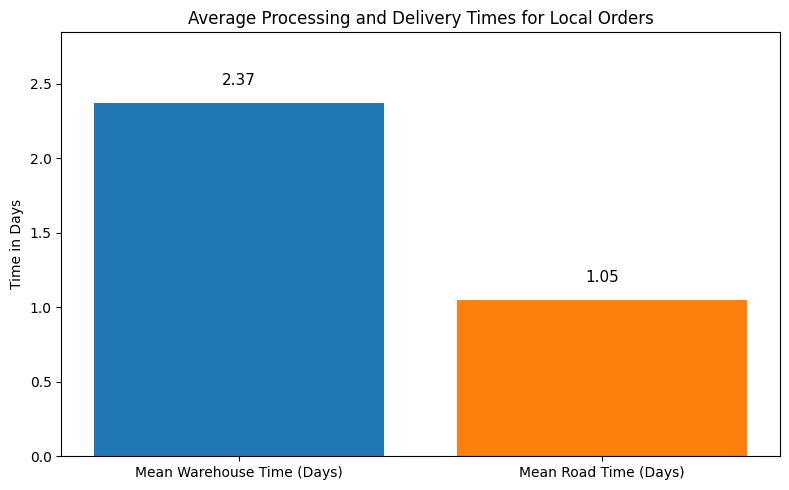

In [75]:
import matplotlib.pyplot as plt

# Calculate the mean for warehouse and road times for local orders
mean_warehouse_time = local_orders['warehouse_time_days'].mean()
mean_road_time = local_orders['road_time_days'].mean()

times = [mean_warehouse_time, mean_road_time]
labels = ['Mean Warehouse Time (Days)', 'Mean Road Time (Days)']
colors = ['#1f77b3', '#ff7f0e']

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=colors)

plt.ylabel('Time in Days')
plt.title('Average Processing and Delivery Times for Local Orders')
plt.ylim(0, max(times) * 1.2) # Set y-axis limit to be slightly above the max value

# Add text labels on top of the bars
for i, time in enumerate(times):
    plt.text(i, time + 0.1, f'{time:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

This new code block calculates the mean `warehouse_time_days` and `road_time_days` specifically for the `local_orders` DataFrame. It then generates a simple bar chart with two bars, clearly showing these two average durations. The exact numerical average for each is also displayed on top of its respective bar for easy reading.

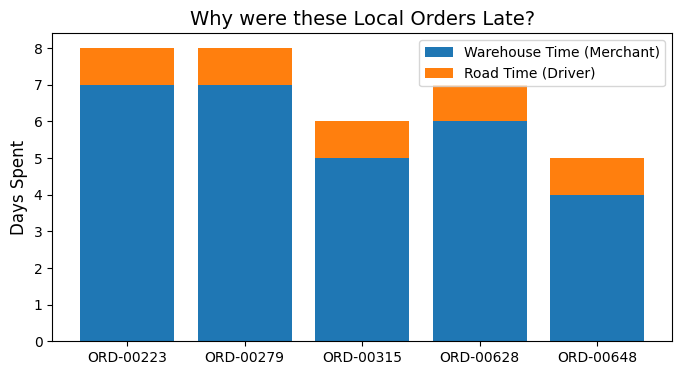

In [76]:
import matplotlib.pyplot as plt

# Get top 5 "Merchant Fails"
sample = local_fails.head(5)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(sample['order_id'], sample['warehouse_time_days'], label='Warehouse Time (Merchant)', color='#1f77b4')
plt.bar(sample['order_id'], sample['road_time_days'], bottom=sample['warehouse_time_days'], label='Road Time (Driver)', color='#ff7f0e')

plt.title('Why were these Local Orders Late?', fontsize=14)
plt.ylabel('Days Spent', fontsize=12)
plt.legend()
plt.show()

In [77]:
import sqlite3
import pandas as pd


# Ensure the DataFrame is saved to CSV first (if not already done)
# df.to_csv('orders_data.csv', index=False)
# print("DataFrame exported to 'orders_data.csv' successfully!")

# 2. Connect to the SQLite database
db_file = 'logistics_database.db'
conn = sqlite3.connect(db_file)

# 3. Write the DataFrame to an SQLite table
# 'orders' will be the name of the table in the database
# if_exists='replace' will drop the table if it exists and create a new one
# index=False prevents pandas from writing the DataFrame index as a column in the table
csv_df.to_sql('orders', conn, if_exists='replace', index=False)

print(f"Data from 'orders_data.csv' successfully imported into the 'orders' table in '{db_file}'!")

# Verify by querying the database
# cursor = conn.cursor()
# cursor.execute("SELECT * FROM orders LIMIT 5")
# print("\nFirst 5 rows from 'orders' table in SQLite:")
# for row in cursor.fetchall():
#     print(row)

# NOTE: Moved conn.close() to the very end after all database operations

#####execute the sql query

sql_query = """
SELECT
    order_id,
    seller_id,

    -- Metric 1: Warehouse Hold Time (Days)
    CAST(julianday(order_delivered_carrier_date) - julianday(order_approved_at) AS INTEGER) as warehouse_days,

    -- Metric 2: Road Transit Time (Days)
    CAST(julianday(order_delivered_customer_date) - julianday(order_delivered_carrier_date) AS INTEGER) as road_days,

    -- Context: Distance
    distance_km,

    -- Logic: Who is to blame?
    CASE
        WHEN CAST(julianday(order_delivered_carrier_date) - julianday(order_approved_at) AS INTEGER) >
             CAST(julianday(order_delivered_customer_date) - julianday(order_delivered_carrier_date) AS INTEGER)
        THEN 'Merchant Bottleneck'
        ELSE 'Transit Delay'
    END as root_cause

FROM orders
WHERE
    order_delivered_customer_date > order_estimated_delivery_date -- Only looks at late orders
    AND distance_km < 50 -- Zoom in on short-distance failures
ORDER BY warehouse_days DESC;
"""

# Execute the query and load results into a pandas DataFrame
results_df = pd.read_sql_query(sql_query, conn)

# Close the connection after all operations are done
conn.close()

print("SQL query executed successfully!")
display(results_df.head())

Data from 'orders_data.csv' successfully imported into the 'orders' table in 'logistics_database.db'!
SQL query executed successfully!


,order_id,seller_id,warehouse_days,road_days,distance_km,root_cause
0,ORD-00040,SELLER-020,7,1,27,Merchant Bottleneck
1,ORD-00138,SELLER-002,7,1,39,Merchant Bottleneck
2,ORD-00223,SELLER-000,7,1,14,Merchant Bottleneck
3,ORD-00279,SELLER-001,7,1,12,Merchant Bottleneck
4,ORD-00503,SELLER-035,7,2,46,Merchant Bottleneck


This block first establishes a connection to `logistics_database.db`. If this database file doesn't exist, it will be created. Then, it takes the `df` DataFrame (which now contains your `logistics_data.csv` data) and writes it as a new table named `orders` into this SQLite database. The `if_exists='replace'` argument ensures that if you run this multiple times, the table is always fresh.

This first block of code is all about getting your data from the `logistics_data.csv` file into a usable format in Python:

1.  **`import pandas as pd`**: First, we import the `pandas` library, which is essential for working with DataFrames, and we give it the shorter alias `pd` for convenience.

2.  **`df = pd.read_csv('logistics_data.csv')`**: This line directly reads the contents of your specified CSV file, `logistics_data.csv`, and loads it into a pandas DataFrame. I'm storing this DataFrame in a variable named `df`.

3.  **Date Conversion Lines (`df['order_approved_at'] = pd.to_datetime(...)`, etc.)**: CSV files often store dates as plain text (strings). For proper date calculations and comparisons, these need to be converted into Python's `datetime` objects. These lines take each of your date columns (`order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`) and use `pd.to_datetime()` to perform this conversion, overwriting the original string columns with the correct `datetime` types.

4.  **`print("DataFrame loaded...")`**: This simply prints a confirmation message so you know this step was successful.

5.  **`display(df.head())`**: Finally, to give you a quick look at the processed data and confirm the date columns are now correctly formatted, I'm displaying the first few rows of the DataFrame.


Next, we'll **create and populate your SQLite database**:

1.  **`import sqlite3`**: We start by importing the `sqlite3` module, which is Python's standard library for interacting with SQLite databases.

2.  **`db_file = 'logistics_database.db'`**: Here, I define the name of your SQLite database file as `logistics_database.db`. This is the file that will store your data.

3.  **`conn = sqlite3.connect(db_file)`**: This is the command to establish a connection to your database. If `logistics_database.db` doesn't exist, this function will create it. If it already exists, it will connect to the existing file.

4.  **`df.to_sql('orders', conn, if_exists='replace', index=False)`**: This is the core command for importing your data. I'm taking the `df` DataFrame (which we just prepared) and telling pandas to:
    *   Create a new table named `'orders'` inside the database (`conn`).
    *   `if_exists='replace'` ensures that if you run this multiple times, any existing 'orders' table will be dropped and a new one created, keeping your data fresh.
    *   `index=False` prevents pandas from writing the DataFrame's internal index as a column in your SQL table.

5.  **`print(f"Data from DataFrame successfully imported...")`**: A confirmation message to let you know the data transfer was successful.

6.  **`conn.close()`**: It's crucial to close the database connection when you're finished interacting with it. This frees up resources and ensures all pending writes are committed to the database file.